<center><h1><strong>taudata Analytics</strong></h1></center>
<center><h2><strong><font color="blue">Supervised Learning - Classification 02</font></strong></h2></center>
<img alt="" src="images/covers/taudata-cover.jpg"/>

<b><center>(C) Taufik Sutanto</center>
<center><h3><font color="blue">https://taudataid.github.io/slcm02/</font></h3></center>
    
<center><font color="blue">Decision Tree, Random Forest, and Support Vector Machines</font></center>

# Outline:

* Decision Tree
* Random Forest
* Support Vector Machines
* Hyperparameter Optimization
* Pemilihan Model

In [1]:
# Installing modules, making sure the environment is as similar as possible as in our original code
# PINN-DCAI is developed using Python 3.9.11
try:
    import google.colab
    IN_COLAB = True
    !pip install graphviz dtreeviz
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/diabetes_data.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/hr_data.csv
except:
    IN_COLAB = False
    print("Running the code locally. Please make sure you have suitable Python information")

Running the code locally. Please make sure you have suitable Python information


In [11]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import cross_val_score
import graphviz, pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns
from pandas.plotting import scatter_matrix 
from sklearn import model_selection, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from dtreeviz.trees import *
from IPython.core.display import display, HTML
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import svm, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import VotingClassifier
from collections import Counter
sns.set(style="ticks", color_codes=True)

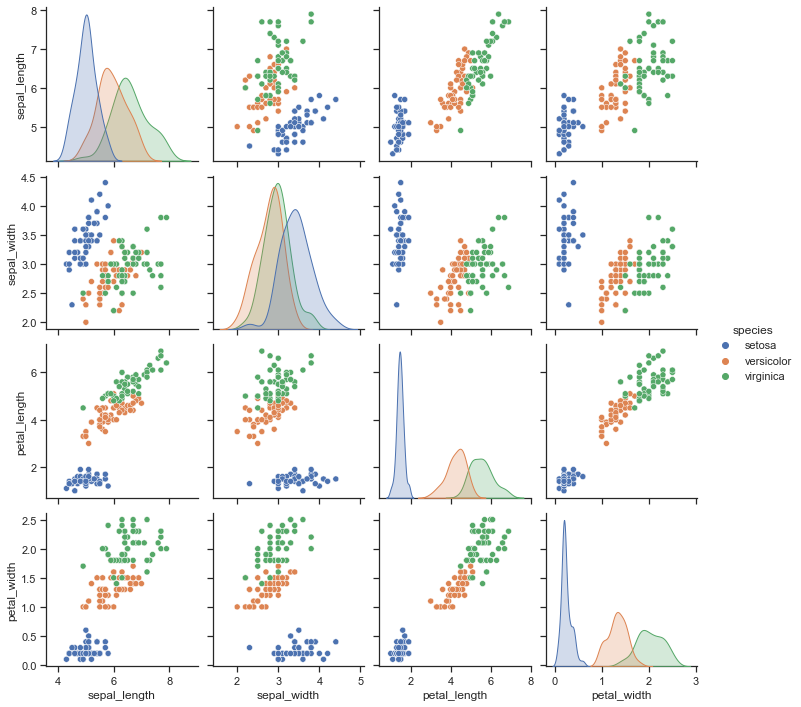

In [2]:
# load kembali iris data
df = sns.load_dataset("iris")
g = sns.pairplot(df, hue="species")

In [3]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [4]:
# Separate Data
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
Y = df['species']

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=0)
print(x_train.shape, x_test.shape, len(y_test))

(105, 4) (45, 4) 45


<img alt="" src="images/meme-cartoon/6_DT_meme.png" />

<img alt="" src="images/6_DT.png" />

# Decision Tree (Pohon Keputusan)

<img alt="" src="images/tree_plot.png" />

# Pengaruh "ketinggian" tree terhadap bentuk model

<p><img alt="" src="images/Dec_Tree_Asumsi_Depth.png" /></p>

<p><img alt="" src="images/Entropy.png" /></p>

<p><img alt="" src="images/Information_Gain.png" /></p>

<p><img alt="" src="images/Contoh_Entropy.png" style="width: 469px; height: 339px;" /></p>

<p><img alt="" src="images/Contoh_Gain.png" style="width: 650px; height: 456px;" /></p>

* Contoh Lain: http://www.saedsayad.com/decision_tree.htm
* Ross Quinlan Website: https://www.rulequest.com/Personal/

## Teori Decision Tree : Information theory

<img alt="" src="images/dec_Tree_Theory.png" />

### Alternative to Information Gain : Gini Index (CART)

* https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1

<p><u><strong>When to use:</strong></u></p>

<ul>
	<li>Target : Binomial/nominal.</li>
	<li>Predictors (input): binomial, nominal, and-or interval (ratio).</li>
</ul>

<p><u><strong>Advantage:</strong></u></p>

<ul>
	<li>Fast and embarrassingly parallel.</li>
	<li>Tanpa iterasi, cocok untuk&nbsp;Big Data technology (e.g. Hadoop)[map-reduce friendly]</li>
	<li>Interpretability</li>
	<li>Robust terhadap outliers &amp; missing values</li>
</ul>

<p><u><strong>Disadvantage:</strong></u></p>

<ul>
	<li>Non probabilistic (ad hoc heuristic) +/-</li>
	<li>Target dengan banyak kelas</li>
	<li>Sensitive (instability)</li>
</ul>


In [5]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
from sklearn import tree

DT = tree.DecisionTreeClassifier() 
# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT = DT.fit(x_train, y_train)
y_DT = DT.predict(x_test)
print(accuracy_score(y_test, y_DT))
print(confusion_matrix(y_test, y_DT))
print(classification_report(y_test, y_DT))

0.9777777777777777
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [6]:
# Varible importance - Salah satu kelebihan Decision Tree
DT.feature_importances_

array([0.02150464, 0.02150464, 0.90006666, 0.05692405])

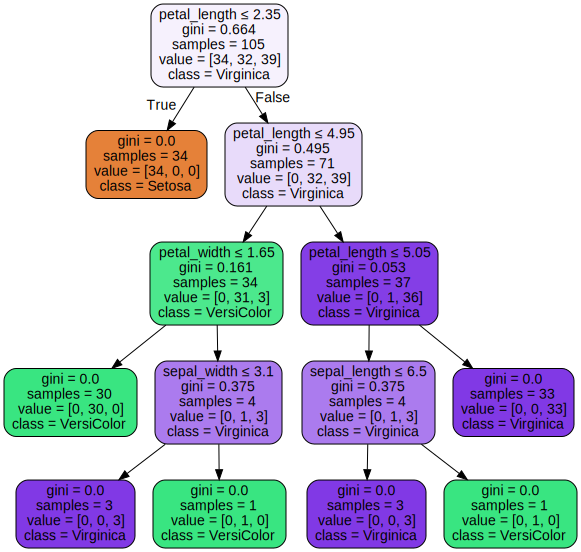

In [7]:
# Kelebihan lain Decision Tree yang tidak dimiliki model lain
# "WARNING" 
# 1. tidak bisa dijalankan di Google Colab
# 2. membutuhkan software "graphViz" + setting system variabel
# caranya ada disini: https://stackoverflow.com/questions/49471867/installing-graphviz-for-use-with-python-3-on-windows-10
import graphviz

dot_data = tree.export_graphviz(DT, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
var_names = ['sepal_length','sepal_width','petal_length','petal_width']
categories = ['Setosa', 'VersiColor', 'Virginica']
dot_data = tree.export_graphviz(DT, out_file=None, 
                         feature_names = var_names,  
                         class_names=categories,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# Curse of Dimensionality

<p><img alt="" src="images/chd_1.PNG" />

<img alt="" src="images/5_RandomForest.png" style="width: 592px; height: 444px;" />

In [9]:
# Mari coba perbaiki dengan Random Forest
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_rf = rf.predict(x_test)
print('Akurasi = ', accuracy_score(y_test, y_rf))
print(confusion_matrix(y_test, y_rf))
print(classification_report(y_test, y_rf))

Akurasi =  0.9777777777777777
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Feature ranking:
1. feature 2 (0.479820)
2. feature 3 (0.385385)
3. feature 0 (0.109922)
4. feature 1 (0.024872)


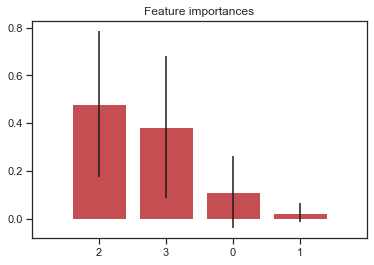

In [10]:
# Varible importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Support Vector Machine (SVM)
Misal data dinyatakan sebagai berikut:
$\{(\bar{x}_1,y_1),...,(\bar{x}_n,y_n)\}$, dimana $\bar{x}_i$ adalah
input pattern untuk data ke $i^{th}$ dan $y_i$ adalah nilai target yang diinginkan. Kategori
(class) direpresentasikan dengan $y_i=\{-1,1\}$. Sebuah bidang datar (hyperplane) yang memisahkan kedua kelas ini ("linearly separable") adalah:
$$ \bar{w}'\bar{x} + b=0 $$
dimana $\bar{x}$ adalah input vector (prediktor), $\bar{w}$ weight, dan $b$ disebut sebagai bias.

## Pemodelan SVM (Hard Margin):

<img alt="" src="images/Pemodelan_SVM_.png" />

* Misal **Xo** adalah sebuah vector di bidang (plane/garis) **_wX + b = -1_**
* Misal **r** adalah jarak antar SV-nya.
* karena **X** berada di bidang _wX + b = 1_ maka  _X = Xo + rw/||w||_ 
 - lihat gambar w tegak lurus X (karena _wX + b = 0_) dan _w/||w||_ adalah unit vektornya
* Sehingga _wX + b = 1_ dapat dituliskan sebagai _w (Xo + r w/||w||) - b = 1_
 - atau _wXo + r||w||²/||w|| - b = 1_ ==> _wXo - b = 1 - r||w||_ ==> _-1 = 1 - r||w||_
* sehingga di dapat $r = \frac{2}{||w||}$
* Kesimpulannya optimal hyperplane bisa didapatkan dengan memaksimumkan $\frac{2}{||w||}$ atau setara dengan $\min \frac{||w||}{2}$
* More details here: https://nlp.stanford.edu/IR-book/html/htmledition/support-vector-machines-the-linearly-separable-case-1.html

<img alt="" src="images/hard_margin_svm.png" style="width: 400px; height: 181px;" />
* Efek outlier pada pemodelan ini?

## Support Vector Machine: Soft Margin

<img alt="" src="images/6_SVM.jpg" style="height: 262px ; width: 232px" />
<img alt="" src="images/svm_opt.png" style="width: 300px; height: 106px;" />
* Apakah efek outlier masih sama pada pemodelan ini? Kaitannya dengan nilai C?
* C >>> ==> toleransi terhadap outlier <<<< dan sebaliknya

## Dual dan Quadratic solver
* optimasi di atas biasanya diselesaikan dengan mencari bentuk *Dual*-nya.
* Solusi untuk parameter optimalnya kemudian ditemukan dengan mencari pendekatan nilai optimalnya lewat Quadratic Programming solver.
* Perhatikan bahwa bentuk fungsi optimasinya konvex ==> memiliki minimum global.
* Nilai optimal dari pemodelan di atas hanya bergantung pada data-data di margin (support vector) sehingga bisa lebih efisien (jika SV telah diketahui).
* SV juga dapat digunakan untuk menganalisa "Error Bound" : http://www.svms.org/vc-dimension/

<img alt="" src="images/Lagrangian_Wolfe_Dual.png" style="width: 290px; height: 120px;" />

## Interpretation
* Recursive Feature Elimination (RFE) method : https://link.springer.com/content/pdf/10.1023/A:1012487302797.pdf 
* melihat bentuk kuadrat dari setiap komponen *w* (higher better).
* hati-hati beberapa diskusi di internet menyatakan bahwa sign (+/-) menyatakan tingkat kepentingan terhadap setiap variabel, namun hal ini tidak selalu benar dan bisa dibuktikan cukup dengan counter example. 

## Bagaimana dengan data kategorik?
* Sama dengan regresi (logistik) ==> Dummy (indicator variable) variable.
* Misal X1 = {a,b,c} ==> X1_a = [1,0,0], X1_b = [0,1,0], X1_c = [0,0,1]
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

In [11]:
# Contoh
df = pd.DataFrame({'X1': ['a', 'b', 'a','c','a'],'X2': [1, 2, 3, 2, 1]})
df = pd.get_dummies(df) # get_dummies(df, prefix=['dummy'])
df

,X2,X1_a,X1_b,X1_c
0,1,1,0,0
1,2,0,1,0
2,3,1,0,0
3,2,0,0,1
4,1,1,0,0


## Normalisasi/Standarisasi Data
* Sama seperti Regresi (logistik) prediktor/features di model SVM perlu untuk di standarisasi/normalisasi.
* http://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range
* Hati-hati standarisasi data dilakukan setelah outlier ditangani dengan baik.

In [12]:
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True)
df['X2'] = scaler.fit_transform(df[['X2']])
df

,X2,X1_a,X1_b,X1_c
0,-1.069045,1,0,0
1,0.267261,0,1,0
2,1.603567,1,0,0
3,0.267261,0,0,1
4,-1.069045,1,0,0


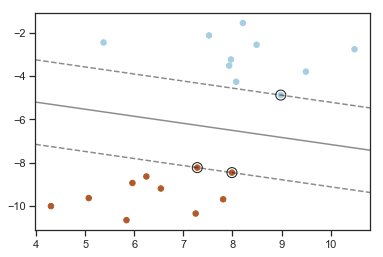

In [13]:
# Contoh plotting Optimal Hyperplane
# http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#example-svm-plot-separating-hyperplane-py

X, y = make_blobs(n_samples=20, centers=2, random_state=6) # we create 20 separable points
clf = svm.SVC(kernel='linear', C=1000) # fit the model, don't regularize for illustration purposes
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca();xlim = ax.get_xlim(); ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30);yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])# plot decision boundary and margins
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')# plot support vectors
plt.show()

<h3>SVM Kernel (trick)</h3>

<p><img alt="" src="images/6_SVM_Kernel.jpg" style="height:168px; width:306px" /></p>


## Definisi Fungsi Kernel
* Jika untuk semua $\bar{x},\bar{z} \in X$, memenuhi <br> 
$$\kappa (\bar{x},\bar{z})=<\phi (\bar{x}),\phi (\bar{z})>$$ maka $\kappa$ disebut fungsi Kernel (fungsi $\phi$ disebut *feature map*).
* Perhatikan hasil pemetaan fungsi kernelnya adalah scalar (inner product).
* Fungsi ini digunakan di SVM (dan model DM/ML lain yang bisa dinyatakan dalam inner product).
* Perhatikan pemodelan SVM; kebanyakan dinyatakan dalam inner product (i.e. w.x).
* See here for more details: https://nlp.stanford.edu/IR-book/html/htmledition/nonlinear-svms-1.html

## Contoh 1
* Misal $X\subseteq \Re^2$ dan $\phi : \bar{x}=(x_1,x_2)\rightarrow \phi (\bar{x})=(x_1^2,
x_2^2,\sqrt{2}x_1x_2)\in F=\Re^3$.
* maka <br>
$<\phi(\bar{x}),\phi(\bar{z})>$<br>
$=<(x_1^2,x_2^2,\sqrt{2}x_1x_2),(z_1^2,z_2^2,\sqrt{2}z_1z_2)>$<br>
$=x_1^2z_1^2+x_2^2z_2^2+2x_1x_2z_1z_2$<br>
$=(x_1z_1+x_2z_2)^2=<\bar{x},\bar{z}>^2$<br>
* Sehingga $\kappa(\bar{x},\bar{z})=<\bar{x},\bar{z}>^2$ adalah sebuah fungsi kernel dan $F$ adalah ruang feature-nya (feature space).

## Contoh 2
* Misal x = (x1, x2, x3); y = (y1, y2, y3). 
* dan fungsi pemetaan variabelnya f(x) = (x1², x1x2, x1x3, x2x1, x2², x2x3, x3x1, x3x2, x3²), 
* maka kernelnya adalah K(x, y ) = <f(x), f(y)> = <x, y>².
* Contoh numerik misal x = (1, 2, 3) dan y = (4, 5, 6). maka:
* f(x) = (1, 2, 3, 2, 4, 6, 3, 6, 9) <br> f(y) = (16, 20, 24, 20, 25, 30, 24, 30, 36)
* <f(x), f(y)> = 16 + 40 + 72 + 40 + 100+ 180 + 72 + 180 + 324 = 1024
* complicated!... Menggunakan fungsi kernel perhitungannya bisa disederhanakan:
* K(x, y) = (4 + 10 + 18)² = 32² = 1024

<h2 id="Well-Known-Kernel-Functions">Well-Known Kernel Functions</h2>

<p><img alt="" src="images/Well-Known_Kernels.png" style="width: 400px; height: 208px;" /></p>


<h3>SVM Binary to MultiClass</h3>

<p><img alt="" src="images/6_SVM_Ova.jpg" style="height:314px; width:432px" /></p>


<p><b>Pros</b></p>

<ul>
	<li>Akurasinya Baik</li>
	<li>Bekerja dengan baik untuk sampel data yang relatif kecil</li>
	<li>Hanya bergantung pada SV ==&gt; meningkatkan efisiensi</li>
	<li>Convex ==&gt; Minimum Global ==&gt; Pasti Konvergen</li>
</ul>

<p><b>Cons</b></p>

<ul>
	<li>Tidak efisien untuk data yang besar</li>
	<li>Akurasi terkadang rendah untuk multiklasifikasi (sulit mendapatkan hubungan antar kategori di modelnya)</li>
	<li>Tidak robust terhadap noise</li>
</ul>

Bacaan lebih lanjut:
* https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72
* Contoh Perhitungan Manual: https://slideplayer.info/slide/3672979/?fbclid=IwAR3Tteg_PbKwkBxV63FGfat3o9UBfHBnjvGHwlyYcrxKTWeb6gfsSpBAQBE


In [14]:
# Contoh Binary SVM (dengan dan tanpa kernel)
# Loading Data
df = sns.load_dataset("iris")
df2 = df[df['species'].isin(['setosa','versicolor'])]
print(df2.shape)
df2.sample(7)

(100, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
49,5.0,3.3,1.4,0.2,setosa
66,5.6,3.0,4.5,1.5,versicolor
94,5.6,2.7,4.2,1.3,versicolor
23,5.1,3.3,1.7,0.5,setosa
30,4.8,3.1,1.6,0.2,setosa
40,5.0,3.5,1.3,0.3,setosa
47,4.6,3.2,1.4,0.2,setosa


In [15]:
# Separate the data
X = df2[['sepal_length','sepal_width','petal_length','petal_width']]
Y = df2['species']
seed = 9
validation_size = 0.3
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(X_train.shape, len(Y_test))

(70, 4) 30


In [16]:
# Fitting and evaluate the model
dSVM = svm.SVC(C = 10**5, kernel = 'linear')
dSVM.fit(X_train, Y_train)
y_SVM = dSVM.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, y_SVM))
print(confusion_matrix(Y_test, y_SVM))
print(classification_report(Y_test, y_SVM))

Akurasi =  1.0
[[18  0]
 [ 0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [17]:
# The Support Vectors
print('index dr SV-nya: ', dSVM.support_)
print('Vector Datanya: \n', dSVM.support_vectors_)

index dr SV-nya:  [21 37]
Vector Datanya: 
 [[4.8 3.4 1.9 0.2]
 [5.1 2.5 3.  1.1]]


In [18]:
# Model Weights for interpretations
print('w = ',dSVM.coef_)
print('b = ',dSVM.intercept_)

w =  [[ 0.20547963 -0.61643888  0.7534253   0.61643888]]
b =  [-1.44520713]


In [19]:
# Menggunakan Kernel: http://scikit-learn.org/stable/modules/svm.html#svm-kernels
for kernel in ('sigmoid', 'poly', 'rbf'):
    dSVM = svm.SVC(kernel=kernel)
    dSVM.fit(X_train, Y_train)
    y_SVM = dSVM.predict(X_test)
    print(accuracy_score(Y_test, y_SVM))

0.4
1.0
1.0


In [20]:
# Contoh Multiklasifikasi SVM (dengan dan tanpa kernel)
# Separate the data
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
Y = df['species']
seed = 9
validation_size = 0.3
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(X_train.shape, len(Y_test))

(105, 4) 45


In [21]:
# One Versus All: http://www.jmlr.org/papers/volume5/rifkin04a/rifkin04a.pdf
dSVM = svm.LinearSVC()
dSVM.fit(X_train, Y_train)
y_SVM = dSVM.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, y_SVM))
y_SVM

Akurasi =  1.0


c:\winpython\python-3.6.8.amd64\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array(['virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica'], dtype=object)

In [22]:
# Ada 3 classifier (as expected)
dSVM.coef_

array([[ 0.21102239,  0.39115963, -0.78331937, -0.3984042 ],
       [ 0.08184422, -0.71898317,  0.27345089, -0.68153776],
       [-0.78631735, -0.97098729,  1.35317845,  1.59064274]])

In [23]:
# All At Once Method http://www.jmlr.org/papers/volume2/crammer01a/crammer01a.pdf
dSVM = svm.SVC(decision_function_shape='ovo')
dSVM.fit(X_train, Y_train)
y_SVM = dSVM.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, y_SVM))
y_SVM

Akurasi =  0.9777777777777777


array(['virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica'], dtype=object)

# Hyperparameter Optimization

In [24]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
file = 'data/diabetes_data.csv'

try:
    # Local jupyter notebook, assuming "file" is in the "data" directory
    data = pd.read_csv(file, names=names).values # Rubah ke numpy array
except:
    # it's a google colab... create folder data and then download the file from github
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/diabetes_data.csv
    data = pd.read_csv(file, names=names).values # Rubah ke numpy array
    
print(data.shape)

(768, 9)


In [25]:
prop_test = 0.2

X, Y = data[:,0:8], data[:,8] # Slice data
Y = [int(y) for y in Y]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=prop_test)

print(set(Y), x_train.shape, x_test.shape, sep='\n')

{0, 1}
(614, 8)
(154, 8)


# Kita mulai dengan menjalankan semua Model sebelumnya 

## Menggunakan default parameter dan cross validasi

Regresi Logistik [0.8064516129032258, 0.7096774193548387, 0.7258064516129032, 0.8387096774193549]
k-NN [0.7741935483870968, 0.6612903225806451, 0.6612903225806451, 0.8225806451612904]
Naive Bayes [0.7580645161290323, 0.6774193548387096, 0.7419354838709677, 0.8064516129032258]
Decision Tree [0.6612903225806451, 0.7258064516129032, 0.7258064516129032, 0.7096774193548387]
Random Forest [0.7741935483870968, 0.7096774193548387, 0.7903225806451613, 0.8064516129032258]
SVM [0.7580645161290323, 0.6935483870967742, 0.6774193548387096, 0.8548387096774194]


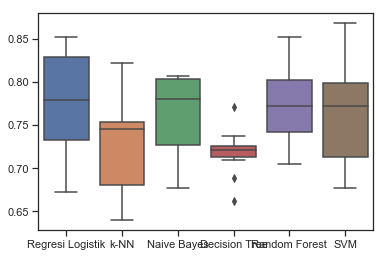

In [26]:
clf = LogisticRegression(solver='liblinear')
kNN = neighbors.KNeighborsClassifier()
gnb = GaussianNB()
dt = tree.DecisionTreeClassifier()
rf = RandomForestClassifier()
svm_ = svm.SVC()

Models = [('Regresi Logistik', clf), ('k-NN',kNN), ('Naive Bayes',gnb), ('Decision Tree', dt), ('Random Forest', rf), ('SVM', svm_)]
Scores = {}
for model_name, model in Models:
    Scores[model_name] = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')

dt = pd.DataFrame.from_dict(Scores)
ax = sns.boxplot(data=dt)
for m, s in Scores.items():
    print(m, list(s)[:4])

# Hyperparameter optimization

* Misal k-NN dan SVM
* Sebagai latihan silahkan lakukan pada model yang lain
* Preprocessing di ML di optimalkan bergantung model.
* Parameter tiap model di ML berbeda-beda dan nilai optimalnya berbeda pada setiap kasus.
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

<img alt="" src="images/rand_grid_search.png" />

<img alt="" src="images/grid_search_workflow.png" />

In [27]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline 

In [28]:
# Hyperparameter optimization pada model kNN menggunakan gridCV
kCV = 10
metric = 'accuracy'
params = {}
params['kneighborsclassifier__n_neighbors'] = [1, 3, 5, 10, 15, 20, 25, 30]
params['kneighborsclassifier__weights'] = ('distance', 'uniform')

pipe = make_pipeline(neighbors.KNeighborsClassifier())
optKnn = GridSearchCV(pipe, params, cv=kCV, scoring=metric, verbose=1, n_jobs=-2) # , pre_dispatch='2*n_jobs', pre_dispatch min 2* n_jobs
optKnn.fit(x_train, y_train)
print(optKnn.best_score_)
print(optKnn.best_params_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    3.4s


0.7656795346377577
{'kneighborsclassifier__n_neighbors': 25, 'kneighborsclassifier__weights': 'uniform'}


[Parallel(n_jobs=-2)]: Done 160 out of 160 | elapsed:    3.7s finished


In [29]:
# Hyperparameter optimization pada model SVM menggunakan RandomizedSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# Berikut ini contoh bagaimana mengetahui parameter yang dapat kita optimasi.
# Gunakan pengetahuan teori/analitik untuk mengoptimasi hanya parameter yang paling penting.

pipeSVM = make_pipeline(svm.SVC())
print(sorted(pipeSVM.get_params().keys()))

['memory', 'steps', 'svc', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose', 'verbose']


In [30]:
# Optimal parameter SVM dengan RandomizedSearch
# WARNING cell ini butuh waktu komputasi cukup lama
kCV = 10
paramsSVM = {}
paramsSVM['svc__C'] = [1, 5, 10] #sp.stats.uniform(scale=100)
paramsSVM['svc__gamma'] = [0.1, 1, 10]
paramsSVM['svc__kernel'] = ['rbf', 'sigmoid', 'linear'] # , 'poly'
#paramsSVM['svc__decision_function_shape'] = ['ovo', 'ovr']

optSvm = RandomizedSearchCV(pipeSVM, paramsSVM, cv=kCV, scoring=metric, verbose=2, n_jobs=-2) # refit=True, pre_dispatch='2*n_jobs' pre_dispatch min 2* n_jobs
optSvm.fit(x_train, y_train)
print(optSvm.best_score_)
print(optSvm.best_params_)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-2)]: Done  27 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:  2.6min finished


0.7785827604442094
{'svc__kernel': 'linear', 'svc__gamma': 0.1, 'svc__C': 10}


# Model Selection

<img alt="" src="images/model_selection.png" />

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   8 out of  10 | elapsed:  2.0min remaining:   30.4s


Accuracy kNN: 0.75 (+/- 0.12)
Accuracy SVM: 0.78 (+/- 0.12)


[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:  2.3min finished


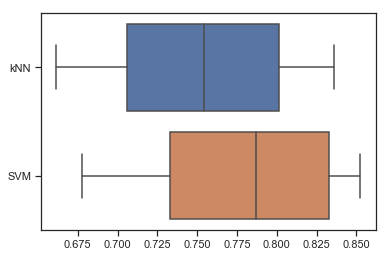

In [31]:
import seaborn as sns, matplotlib.pyplot as plt

kCV = 10
# Menggunakan parameter optimal
kNN = neighbors.KNeighborsClassifier(n_neighbors= 20, weights= 'uniform')
svm_ = svm.SVC(kernel= 'linear', gamma= 10, C= 10)

models = ['kNN', 'SVM']
knn_score = cross_val_score(kNN, x_train, y_train, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=1)
svm_score = cross_val_score(svm_, x_train, y_train, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=1)
scores = [knn_score, svm_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

sns.boxplot(data=pd.DataFrame(data), orient='h')
plt.show()

<h1>End of Module</h1>
<hr />